In [207]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt

df=pd.read_csv('Sales.csv') #dataset
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [208]:
df.shape

(400, 5)

In [209]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [210]:
Gender = pd.get_dummies(df, columns=['Gender'])
Gender.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


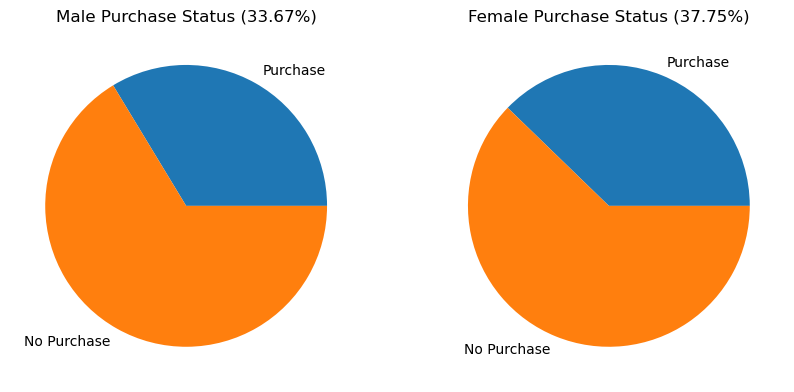

In [211]:
gender_dummies = pd.get_dummies(df, columns=['Gender'])

# DataFrames for males and females
male_df = gender_dummies[gender_dummies['Gender_Male'] == 1]
female_df = gender_dummies[gender_dummies['Gender_Female'] == 1]

# count number of males and females, purhcase
male_purchase = len(male_df[male_df['Purchased'] == 1])
female_purchase = len(female_df[female_df['Purchased'] == 1])

# count number of males and females, did not make a purchase
male_no_purchase = len(male_df[male_df['Purchased'] == 0])
female_no_purchase = len(female_df[female_df['Purchased'] == 0])

# calculate percentage 
male_purchase_pct = round(male_purchase / len(male_df) * 100, 2)
female_purchase_pct = round(female_purchase / len(female_df) * 100, 2)

# create two pie charts
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie([male_purchase_pct, 100-male_purchase_pct], labels=['Purchase', 'No Purchase'])
axs[0].set_title(f'Male Purchase Status ({male_purchase_pct}%)')

axs[1].pie([female_purchase_pct, 100-female_purchase_pct], labels=['Purchase', 'No Purchase'])
axs[1].set_title(f'Female Purchase Status ({female_purchase_pct}%)')

plt.show()


In [212]:
X=df.iloc[:,[2,3]] #variable 
Y=df.iloc[:,[4]]   #target 
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [213]:
X.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


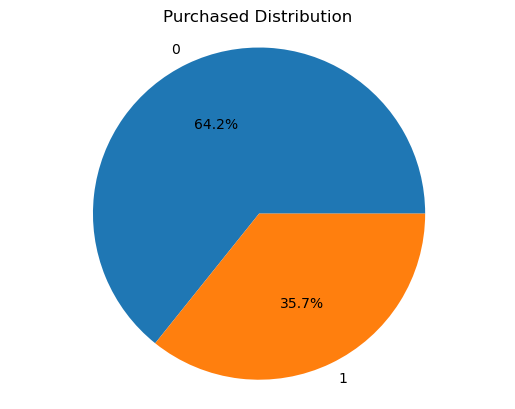

In [214]:
Y.Purchased.value_counts(normalize=True)

import matplotlib.pyplot as plt

counts = Y.Purchased.value_counts(normalize=True)
labels = counts.index
sizes = counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Purchased Distribution')
plt.show()


In [215]:
#split 
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [216]:
print("Training data: ",X_Train.shape)
print("Test data: ",X_Test.shape)

Training data:  (300, 2)
Test data:  (100, 2)


In [217]:
#feature

from sklearn.preprocessing import StandardScaler # to be units and precision
sc_X=StandardScaler()
X_Train=sc_X.fit_transform(X_Train) #transformation,mean and standard deviation from the training data during the fit step.
X_Test=sc_X.transform(X_Test) 

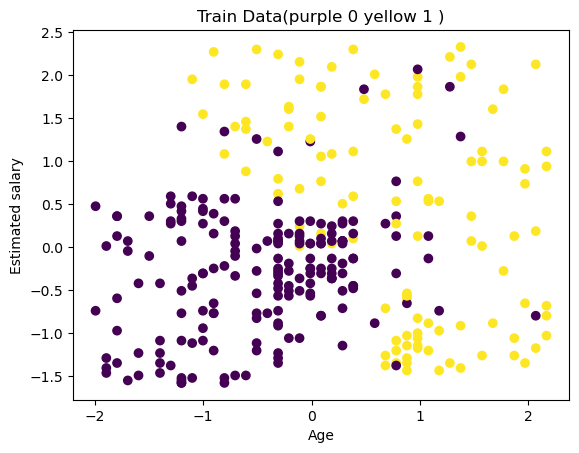

In [218]:
#scatter plot train data , purple 0 yellow 1 
import matplotlib.pyplot as plt

plt.scatter(X_Train[:, 0], X_Train[:, 1],c=Y_Train.values.ravel()) 
plt.xlabel('Age')
plt.ylabel('Estimated salary') 
plt.title('Train Data(purple 0 yellow 1 )') 
plt.show()

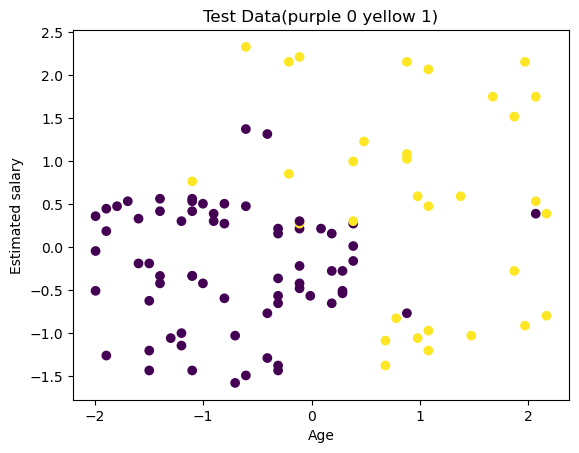

In [219]:
#scatter plot test data
import matplotlib.pyplot as plt

plt.scatter(X_Test[:, 0], X_Test[:, 1],c=Y_Test.values.ravel()) 
plt.xlabel('Age')
plt.ylabel('Estimated salary') 
plt.title('Test Data(purple 0 yellow 1)') 
plt.show()

In [220]:
##model
from sklearn.svm import SVC #algo
#a kernel is a function that computes a similarity measure between pairs of data points in a given feature space.
Linear=SVC(kernel='linear',random_state=0)  #hyperplane separates the different classes of data points
Linear.fit(X_Train,Y_Train.values.ravel()) #train

#predicting results
Y_Pred_linear=Linear.predict(X_Test) 

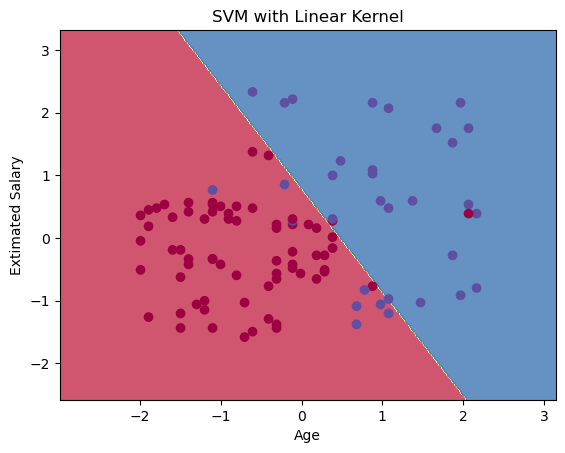

In [221]:
# Create a meshgrid for plotting the decision boundary
h = 0.02
x_min, x_max = X_Test[:, 0].min() - 1, X_Test[:, 0].max() + 1
y_min, y_max = X_Test[:, 1].min() - 1, X_Test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class labels for the meshgrid points
Z = Linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot data points and decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test.values.ravel(), cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Age')
plt.ylabel('Extimated Salary')
plt.title('SVM with Linear Kernel')
plt.show()

In [222]:
from sklearn.svm import SVC
Rbf=SVC(kernel='rbf') #radial basis function
Rbf.fit(X_Train,Y_Train.values.ravel())

#predicting results
Y_Pred_rbf=Rbf.predict(X_Test)

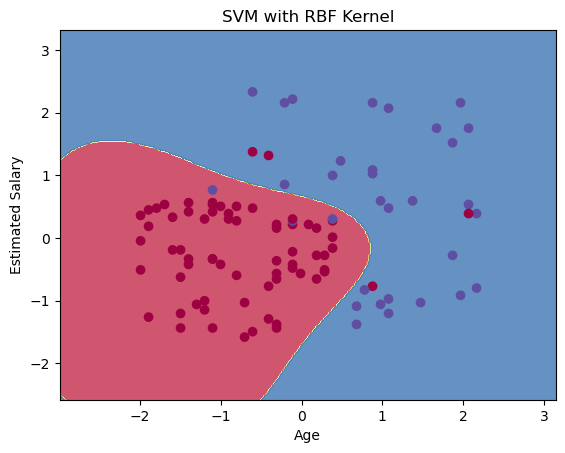

In [223]:
# Create a meshgrid for plotting the decision boundary
h = 0.02
x_min, x_max = X_Test[:, 0].min() - 1, X_Test[:, 0].max() + 1
y_min, y_max = X_Test[:, 1].min() - 1, X_Test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class labels for the meshgrid points
Z = Rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot data points and decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test.values.ravel(), cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('SVM with RBF Kernel')
plt.show()

In [224]:
#third
poly=SVC(kernel='poly',degree=4)
poly.fit(X_Train,Y_Train.values.ravel())

#predicting results
Y_Pred_poly=poly.predict(X_Test)

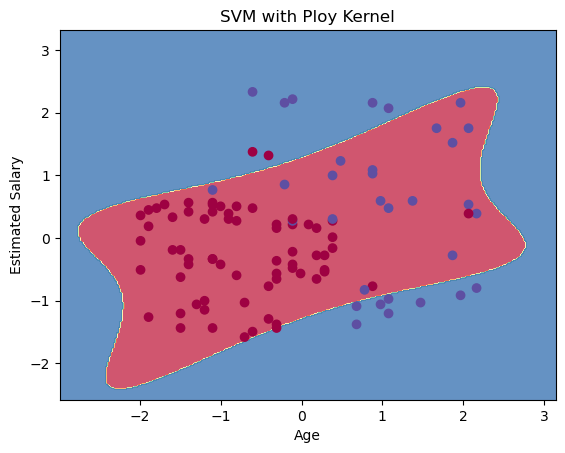

In [225]:
# Create a meshgrid for plotting the decision boundary
h = 0.02
x_min, x_max = X_Test[:, 0].min() - 1, X_Test[:, 0].max() + 1
y_min, y_max = X_Test[:, 1].min() - 1, X_Test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class labels for the meshgrid points
Z = poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot data points and decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test.values.ravel(), cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('SVM with Ploy Kernel')
plt.show()

In [226]:

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_Train, Y_Train.values.ravel())

Y_Pred_nb= nb.predict(X_Test)

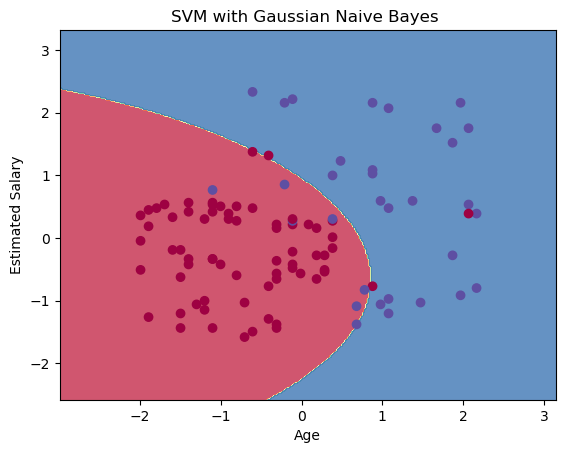

In [227]:
# Create a meshgrid for plotting the decision boundary
h = 0.02
x_min, x_max = X_Test[:, 0].min() - 1, X_Test[:, 0].max() + 1
y_min, y_max = X_Test[:, 1].min() - 1, X_Test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class labels for the meshgrid points
Z = nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot data points and decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test.values.ravel(), cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('SVM with Gaussian Naive Bayes ')
plt.show()


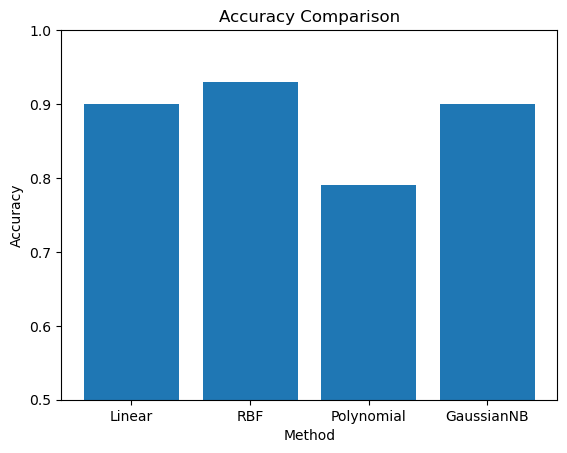

Linear: 0.9
RBF: 0.93
Poly: 0.79
Gaussian Naive: 0.9


In [228]:
# Accuracy comparision

accuracy_linear = metrics.accuracy_score(Y_Test, Y_Pred_linear)
accuracy_rbf = metrics.accuracy_score(Y_Test, Y_Pred_rbf)
accuracy_poly = metrics.accuracy_score(Y_Test, Y_Pred_poly)
accuracy_nb = metrics.accuracy_score(Y_Test, Y_Pred_nb)

# Plot the accuracies as a bar chart
methods = ['Linear', 'RBF', 'Polynomial', 'GaussianNB']
#plt.plot(fpr_L, tpr_L, label='SVM with linear kernel (AUC = %0.2f)' % roc_auc_L)
accuracies = [accuracy_linear, accuracy_rbf, accuracy_poly, accuracy_nb]
plt.bar(methods, accuracies)
plt.ylim(0.5, 1.0)
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

print("Linear:", accuracy_linear )
print("RBF:", accuracy_rbf )
print("Poly:",accuracy_poly)
print("Gaussian Naive:",accuracy_nb)

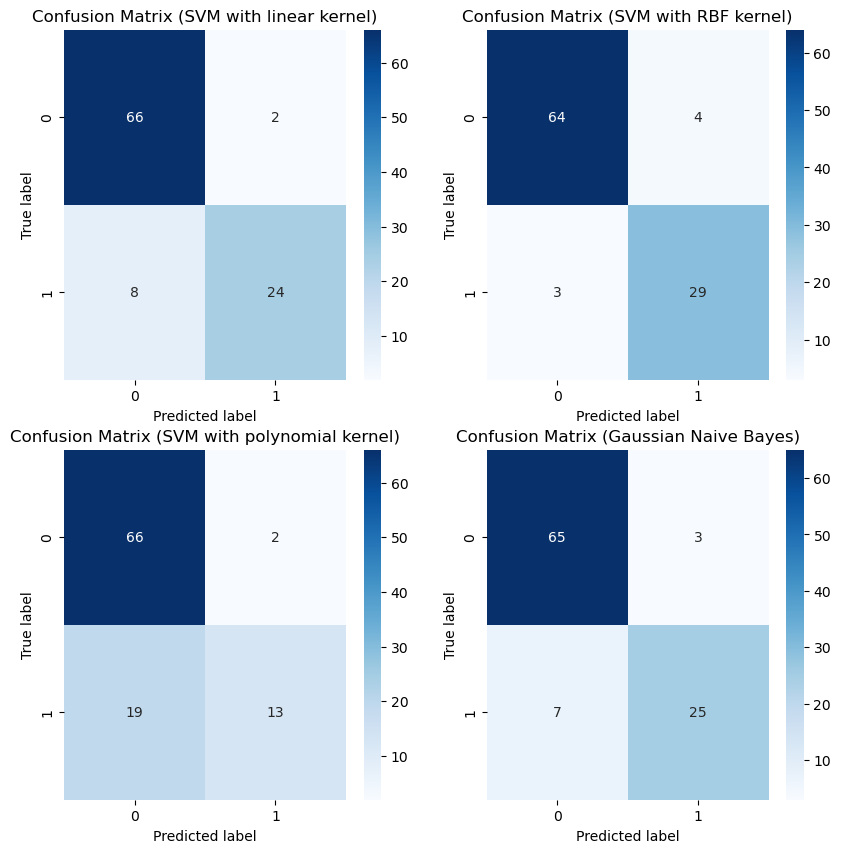

In [229]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Calculate confusion matrices for all models
cm_linear = confusion_matrix(Y_Test, Y_Pred_linear)
cm_rbf = confusion_matrix(Y_Test, Y_Pred_rbf)
cm_poly = confusion_matrix(Y_Test, Y_Pred_poly)
cm_nb = confusion_matrix(Y_Test, Y_Pred_nb)

# Plot confusion matrices as heatmaps
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.heatmap(cm_linear, annot=True, cmap='Blues', fmt='g', ax=axs[0][0])
sns.heatmap(cm_rbf, annot=True, cmap='Blues', fmt='g', ax=axs[0][1])
sns.heatmap(cm_poly, annot=True, cmap='Blues', fmt='g', ax=axs[1][0])
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g', ax=axs[1][1])

# Add labels and titles to the plots
axs[0][0].set_xlabel('Predicted label')
axs[0][0].set_ylabel('True label')
axs[0][0].set_title('Confusion Matrix (SVM with linear kernel)')

axs[0][1].set_xlabel('Predicted label')
axs[0][1].set_ylabel('True label')
axs[0][1].set_title('Confusion Matrix (SVM with RBF kernel)')

axs[1][0].set_xlabel('Predicted label')
axs[1][0].set_ylabel('True label')
axs[1][0].set_title('Confusion Matrix (SVM with polynomial kernel)')

axs[1][1].set_xlabel('Predicted label')
axs[1][1].set_ylabel('True label')
axs[1][1].set_title('Confusion Matrix (Gaussian Naive Bayes)')

# Show the plots
plt.show()


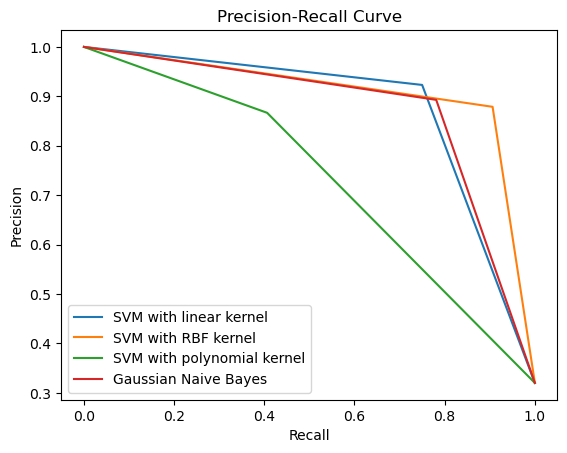

precision_linear [0.32       0.92307692 1.        ]
recall_linear [1.   0.75 0.  ]
precision_rb [0.32       0.87878788 1.        ]
recall_rbf [1.      0.90625 0.     ]
precision_poly [0.32       0.86666667 1.        ]
recall_poly [1.      0.40625 0.     ]
precision_nb [0.32       0.89285714 1.        ]
recall_nb [1.      0.78125 0.     ]


In [230]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall values for all models
precision_linear, recall_linear, _ = precision_recall_curve(Y_Test, Y_Pred_linear)
precision_rbf, recall_rbf, _ = precision_recall_curve(Y_Test, Y_Pred_rbf)
precision_poly, recall_poly, _ = precision_recall_curve(Y_Test, Y_Pred_poly)
precision_nb, recall_nb, _ = precision_recall_curve(Y_Test, Y_Pred_nb)

# Plot precision-recall curves for all models
plt.plot(recall_linear, precision_linear, label='SVM with linear kernel')
plt.plot(recall_rbf, precision_rbf, label='SVM with RBF kernel')
plt.plot(recall_poly, precision_poly, label='SVM with polynomial kernel')
plt.plot(recall_nb, precision_nb, label='Gaussian Naive Bayes')

# Add labels and title to the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

print("precision_linear",precision_linear)
print("recall_linear",recall_linear)
print("precision_rb",precision_rbf) 
print("recall_rbf",recall_rbf)
print("precision_poly",precision_poly)
print("recall_poly",recall_poly)
print("precision_nb",precision_nb)
print("recall_nb",recall_nb)

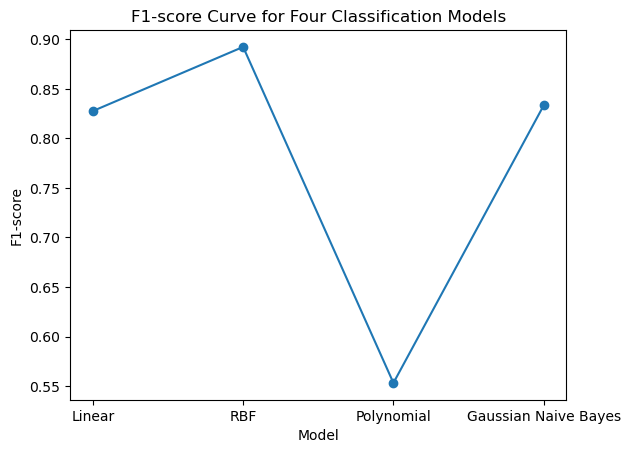

linear 0.8275862068965517
RBF 0.8923076923076922
Poly 0.5531914893617021
Nb 0.8333333333333334


In [231]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Calculate the F1-score for each model
f1_linear = f1_score(Y_Test, Y_Pred_linear)
f1_rbf = f1_score(Y_Test, Y_Pred_rbf)
f1_poly = f1_score(Y_Test, Y_Pred_poly)
f1_nb = f1_score(Y_Test, Y_Pred_nb)

# Define the x-axis labels
labels = ['Linear', 'RBF', 'Polynomial', 'Gaussian Naive Bayes']

# Plot the F1-score for each model
plt.plot(labels, [f1_linear, f1_rbf, f1_poly, f1_nb], marker='o')

# Add labels and title to the plot
plt.xlabel('Model')
plt.ylabel('F1-score')
plt.title('F1-score Curve for Four Classification Models')

# Show the plot
plt.show()

print("linear",f1_linear)
print("RBF",f1_rbf)
print("Poly",f1_poly)
print("Nb",f1_nb)

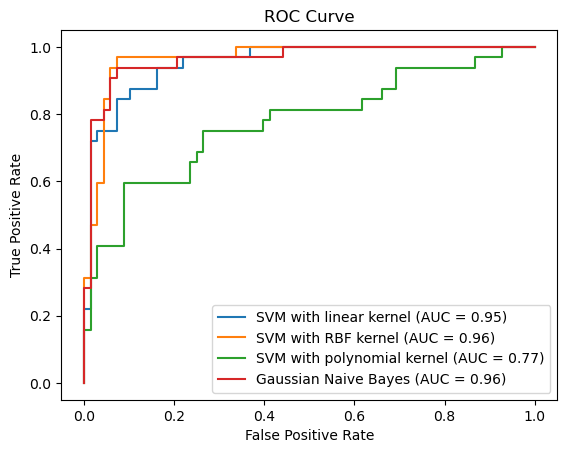

In [233]:
from sklearn.metrics import roc_curve, auc

# Train and predict using the SVM model with linear kernel
classifier_L = SVC(kernel='linear', random_state=0)
classifier_L.fit(X_Train, Y_Train.values.ravel())
Y_Pred_L = classifier_L.decision_function(X_Test)
# Train and predict using the SVM model with RBF kernel
classifier_R = SVC(kernel='rbf')
classifier_R.fit(X_Train, Y_Train.values.ravel())
Y_Pred_R = classifier_R.decision_function(X_Test)

# Train and predict using the SVM model with polynomial kernel
classifier_P = SVC(kernel='poly', degree=4)
classifier_P.fit(X_Train, Y_Train.values.ravel())
Y_Pred_P = classifier_P.decision_function(X_Test)

# Train and predict using the Gaussian Naive Bayes model
nb = GaussianNB()
nb.fit(X_Train, Y_Train.values.ravel())
Y_Pred_nb = nb.predict_proba(X_Test)[:, 1]

# Calculate false positive rate and true positive rate for each model
fpr_L, tpr_L, _ = roc_curve(Y_Test, Y_Pred_L)
fpr_R, tpr_R, _ = roc_curve(Y_Test, Y_Pred_R)
fpr_P, tpr_P, _ = roc_curve(Y_Test,  Y_Pred_P)
fpr_nb, tpr_nb, _ = roc_curve(Y_Test, Y_Pred_nb)

# Calculate AUC for each model
roc_auc_L = auc(fpr_L, tpr_L)
roc_auc_R = auc(fpr_R, tpr_R)
roc_auc_P = auc(fpr_P, tpr_P)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curves for each model
plt.plot(fpr_L, tpr_L, label='SVM with linear kernel (AUC = %0.2f)' % roc_auc_L)
plt.plot(fpr_R, tpr_R, label='SVM with RBF kernel (AUC = %0.2f)' % roc_auc_R)
plt.plot(fpr_P, tpr_P, label='SVM with polynomial kernel (AUC = %0.2f)' % roc_auc_P)
plt.plot(fpr_nb, tpr_nb, label='Gaussian Naive Bayes (AUC = %0.2f)' % roc_auc_nb)

# Add labels and title to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()